# **Fully automated** modeling of a lensed quasar

## Setting up the 

Setting up `dolphin`:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
        - **masks**: contains the custom 'mask_{lens_name}_{band}.npy' files (optional),
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_variance_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis import Output
from dolphin.ai import Vision
from dolphin.ai import Modeler

import matplotlib.pyplot as plt
import numpy as np

## Run the automated model

In [2]:
io_directory_path = "../io_directory_example/"
lens_name = "lensed_quasar"
band = "F814W"

vision = Vision(io_directory_path=io_directory_path, source_type="quasar")
segementation = vision.create_segmentation_for_single_lens(lens_name, band)
# above line will save the segmentation result in output/semantic_segmentation_lensed_quasar_F814W.npy

modeler = Modeler(io_directory_path=io_directory_path, source_type="quasar")
modeler.create_config_for_single_lens(
    lens_name,
    band,
    psf_iteration_settings={
        "stacking_method": "median",
        "num_iter": 20,
        "psf_iter_factor": 0.5,
        "keep_psf_variance_map": True,
        "psf_symmetry": 4,
    },
)
# above line will save the config file in settings/config_lensed_quasar.yml and a mask in
# output/masks/mask_lensed_quasar_F814W.npy

processor = Processor(io_directory_path)
processor.swim(lens_name=lens_name, model_id="example", log=False)

Optimizing model for lensed_quasar with recipe: galaxy-quasar.
Computing the PSO ...


  0%|          | 0/10 [00:00<?, ?it/s]/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:115: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(
/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:115: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  x = scipy.optimize.fsolve(
100%|██████████| 10/10 [00:15<00:00,  1.51s/it]


Max iteration reached! Stopping.
-1.1180299080686393 reduced X^2 of best position
-3051.662634073351 log likelihood
5459 effective number of data points
[{'theta_E': 0.6926797424275738, 'gamma': 2.0, 'e1': 0.0608907353486556, 'e2': 0.06486254011276099, 'center_x': -0.1573324843459196, 'center_y': 0.10149754039710825}, {'gamma_ext': 0.05656754933371194, 'psi_ext': 0.12398695013434591, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18949934754314476, 'n_sersic': 0.9181883239254595, 'e1': -0.05972732258090627, 'e2': 0.045218286703541194, 'center_x': -0.14588084239290366, 'center_y': 0.1157877651946751}, {'amp': 1, 'n_max': 6, 'beta': 0.10404830197767057, 'center_x': -0.14588084239290366, 'center_y': 0.1157877651946751}] source result
[{'amp': 1, 'R_sersic': 0.1431370940044303, 'n_sersic': 4.0, 'e1': -0.007472106584811386, 'e2': -0.039272085245452185, 'center_x': -0.1646701830595292, 'center_y': 0.04010359724293528}] lens light result
[{'ra_image': array([ 0.51175867,  0.222

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


Max iteration reached! Stopping.
-1.073080286913776 reduced X^2 of best position
-2928.972643131152 log likelihood
5459 effective number of data points
[{'theta_E': 0.6958787167911507, 'gamma': 2.0, 'e1': 0.06422500121037032, 'e2': 0.04271328566917849, 'center_x': -0.16488742287085315, 'center_y': 0.09217383909350345}, {'gamma_ext': 0.053166488131914984, 'psi_ext': 0.08709844212563424, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18885560675721452, 'n_sersic': 1.4070985215303908, 'e1': -0.05869204154142539, 'e2': 0.04363291134511224, 'center_x': -0.15386334362180082, 'center_y': 0.10328282249758877}, {'amp': 1, 'n_max': 6, 'beta': 0.1043440004640225, 'center_x': -0.15386334362180082, 'center_y': 0.10328282249758877}] source result
[{'amp': 1, 'R_sersic': 0.13822313416398577, 'n_sersic': 4.0, 'e1': 0.0013551574519839894, 'e2': -0.07175007011815414, 'center_x': -0.1654566936340054, 'center_y': 0.04149447360957776}] lens light result
[{'ra_image': array([ 0.50782557,  0.2

100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


Max iteration reached! Stopping.
-0.9787422060723527 reduced X^2 of best position
-2671.476851474487 log likelihood
5459 effective number of data points
[{'theta_E': 0.69498960993858, 'gamma': 2.0, 'e1': 0.024129492273679838, 'e2': 0.09984782922745322, 'center_x': -0.16076880918852865, 'center_y': 0.08442941806543568}, {'gamma_ext': 0.04568851388223425, 'psi_ext': 0.3308973538391046, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.1859656683680042, 'n_sersic': 1.4704900740636082, 'e1': -0.05963870254497423, 'e2': 0.05448293492562226, 'center_x': -0.15089083072382836, 'center_y': 0.1009848111416677}, {'amp': 1, 'n_max': 6, 'beta': 0.10428054357703102, 'center_x': -0.15089083072382836, 'center_y': 0.1009848111416677}] source result
[{'amp': 1, 'R_sersic': 0.142217614030439, 'n_sersic': 4.0, 'e1': 0.004005380088550571, 'e2': -0.062200969182111224, 'center_x': -0.16569724430134797, 'center_y': 0.042737453744759284}] lens light result
[{'ra_image': array([ 0.51510272,  0.20796

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


Max iteration reached! Stopping.
-0.9789203918470976 reduced X^2 of best position
-2671.473749350729 log likelihood
5458 effective number of data points
[{'theta_E': 0.6949926290460938, 'gamma': 2.0, 'e1': 0.024084140179971583, 'e2': 0.0999182239482263, 'center_x': -0.1607727721846196, 'center_y': 0.08442365200139577}, {'gamma_ext': 0.04568851388223425, 'psi_ext': 0.3312087945227986, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.1859656683680042, 'n_sersic': 1.4704900740636082, 'e1': -0.05963870254497423, 'e2': 0.05448293492562226, 'center_x': -0.15089518938945418, 'center_y': 0.10098627144111569}, {'amp': 1, 'n_max': 6, 'beta': 0.10428054357703102, 'center_x': -0.15089518938945418, 'center_y': 0.10098627144111569}] source result
[{'amp': 1, 'R_sersic': 0.142217614030439, 'n_sersic': 4.0, 'e1': 0.004005380088550571, 'e2': -0.062200969182111224, 'center_x': -0.16569724430134797, 'center_y': 0.042737453744759284}] lens light result
[{'ra_image': array([ 0.51510272,  0.207

100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


Max iteration reached! Stopping.
-0.9756363380154236 reduced X^2 of best position
-2662.511566444091 log likelihood
5458 effective number of data points
[{'theta_E': 0.6973813210112124, 'gamma': 2.001590546546039, 'e1': 0.010838626271282934, 'e2': 0.12252680849370255, 'center_x': -0.16054244638566173, 'center_y': 0.08074987176149019}, {'gamma_ext': 0.04790910504243439, 'psi_ext': 0.43843383424196997, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18538589636077166, 'n_sersic': 1.5198805406919975, 'e1': -0.05893045827709892, 'e2': 0.0468242387409771, 'center_x': -0.15071838102241591, 'center_y': 0.09918392326254456}, {'amp': 1, 'n_max': 6, 'beta': 0.10422012434809909, 'center_x': -0.15071838102241591, 'center_y': 0.09918392326254456}] source result
[{'amp': 1, 'R_sersic': 0.14489354622735548, 'n_sersic': 4.0, 'e1': 0.004329349745157239, 'e2': -0.05498539838278451, 'center_x': -0.16570478222583127, 'center_y': 0.04315836960380649}] lens light result
[{'ra_image': array([ 0

100%|██████████| 10/10 [00:15<00:00,  1.51s/it]


Max iteration reached! Stopping.
-0.9455934066728567 reduced X^2 of best position
-2580.524406810226 log likelihood
5458 effective number of data points
[{'theta_E': 0.7024625791778216, 'gamma': 2.0009495679580835, 'e1': -0.006920429851451205, 'e2': 0.14733210296055163, 'center_x': -0.15896969512165332, 'center_y': 0.07618333494847368}, {'gamma_ext': 0.04939048293757165, 'psi_ext': 0.5277500585762125, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18527195866690177, 'n_sersic': 1.6945743701635625, 'e1': -0.0238198260948111, 'e2': 0.03943021124712066, 'center_x': -0.1482950283617276, 'center_y': 0.09682131240247335}, {'amp': 1, 'n_max': 6, 'beta': 0.10424567880929085, 'center_x': -0.1482950283617276, 'center_y': 0.09682131240247335}] source result
[{'amp': 1, 'R_sersic': 0.17663516902764417, 'n_sersic': 4.0, 'e1': 0.002212809357863244, 'e2': -0.04330302313466022, 'center_x': -0.16578930463000507, 'center_y': 0.0441000027027463}] lens light result
[{'ra_image': array([ 0.5

## Let's check the output

-0.9361597729242259 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9361597729242793


/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


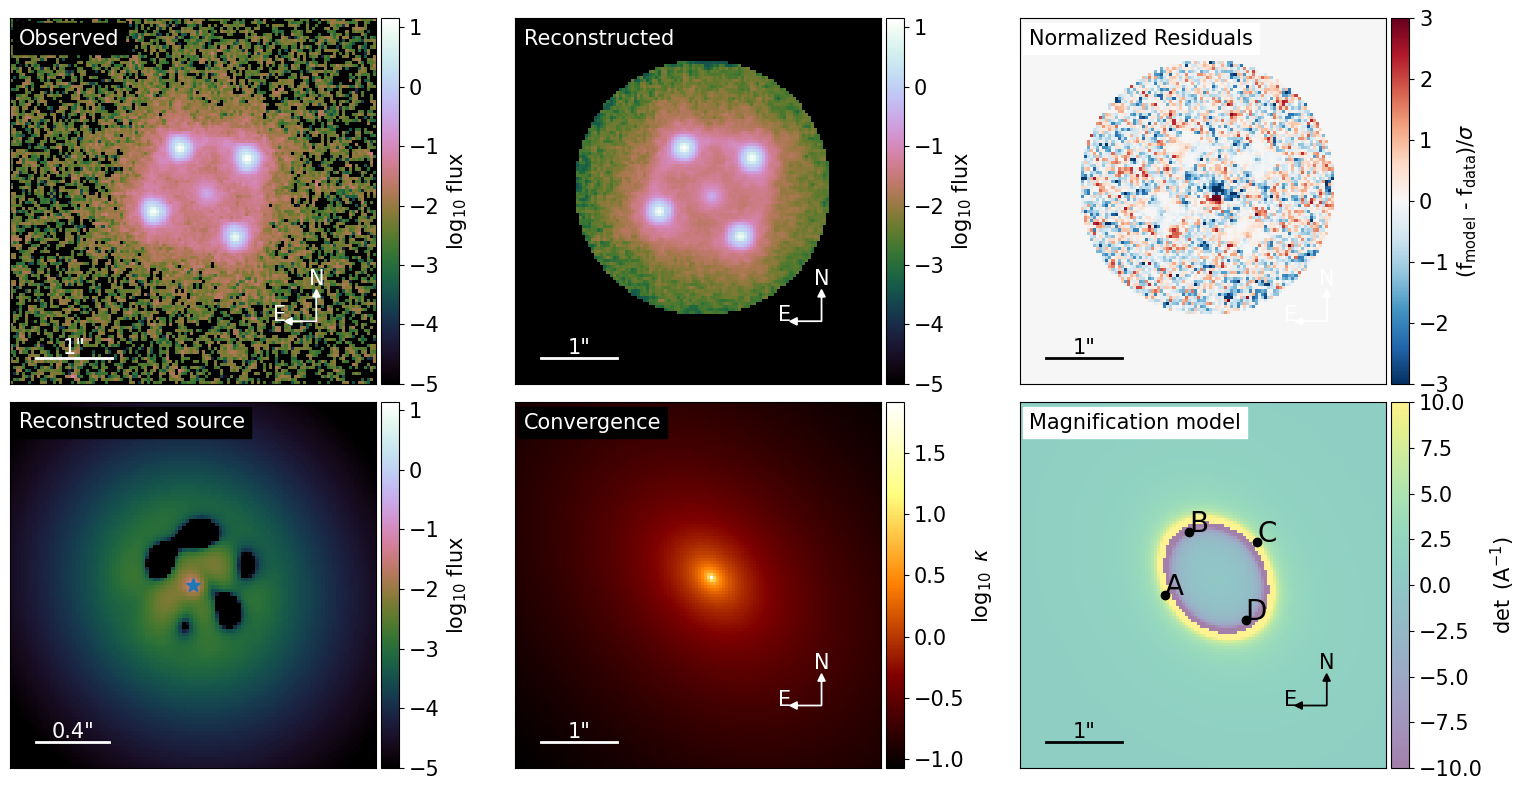

In [3]:
output = Output("../io_directory_example/")

fig = output.plot_model_overview(lens_name="lensed_quasar", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

## Let's check the segmentation result as a demonstration

/var/folders/bn/g_64xdl56nj_f4wtmm1_bk9h0000gn/T/ipykernel_97003/4001223938.py:5: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
/var/folders/bn/g_64xdl56nj_f4wtmm1_bk9h0000gn/T/ipykernel_97003/4001223938.py:15: RuntimeWarning: invalid value encountered in log10
  axes[2].matshow(np.log10(image), origin="lower", cmap="cubehelix")


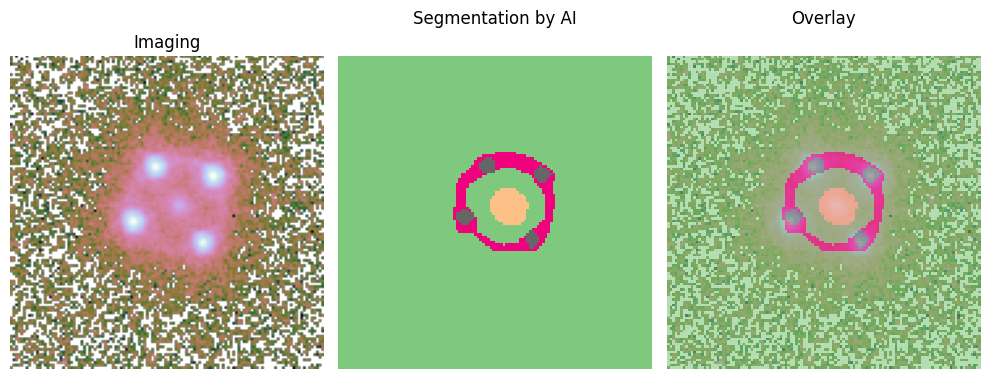

In [4]:
image = vision.get_image_data(lens_name, band).get_image()

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].set_title("Imaging")
axes[0].axis("off")

cmap = "Accent"
# use qualitaive cmap for the segmentation plot
axes[1].matshow(segementation, origin="lower", cmap=cmap)
axes[1].set_title("Segmentation by AI")
axes[1].axis("off")

axes[2].matshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[2].matshow(segementation, origin="lower", cmap=cmap, alpha=0.6)
axes[2].set_title("Overlay")
axes[2].axis("off")

fig.tight_layout()

## Let's check the automatically generated config file as a demonstration

In [5]:
output.get_lens_config(lens_name="lensed_quasar").settings

{'lens_name': 'lensed_quasar',
 'band': ['F814W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE', 'SHAPELETS'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [-0.16008935988030437, 0.03994080056331972],
  'centroid_bound': 0.2},
 'lens_light_option': {'fix': {0: {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [6]},
 'point_source_option': {'ra_init': [0.4802680796409138,
   0.1598230001460359,
   -0.6805092599176747,
   -0.5200795514880268],
  'dec_init': [-0.11982240168995872,
   0.6800588031823716,
   0.5197482097704862,
   -0.44019208446788327],
  'bound': 0.2},
 'satellites': {'centroid_init': [], 'centroid_bound': 0.25},
 'guess_params': {'lens': {0: {'theta_E': 0.6708862847220125}}},
 'numeric_option': {'supersampling_factor': [3]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 10, 'num_iteration': 10},
  'psf_iteration': True,
  'psf_iteration_settings': {'s